<a href="https://colab.research.google.com/github/DeepthiManthapuram/PolynomialRegression/blob/main/CarPrice_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/CarPrice_Assignment.csv'

df = pd.read_csv(path)
print(df.head(5))
df.dtypes

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

,0
car_ID,int64
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


In [4]:

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df.dtypes


,0
car_ID,int64
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


In [5]:
cont = ['enginesize','price']
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
df[cont] = st.fit_transform(df[cont])

In [6]:
x = df.drop('enginesize',axis = 1)
y = df.enginesize

In [7]:

print(x.shape)
print(y.shape)

(205, 25)
(205,)


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [9]:
print("x train shape : ",x_train.shape)
print("y train shape : ",y_train.shape)
print("x test shape : ",x_test.shape)
print("y test shape : ",y_test.shape)

x train shape :  (153, 25)
y train shape :  (153,)
x test shape :  (52, 25)
y test shape :  (52,)


In [10]:
X = df[['enginesize']]
y = df[['price']]

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [12]:
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

print("✅ Models Trained Successfully!")

✅ Models Trained Successfully!


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

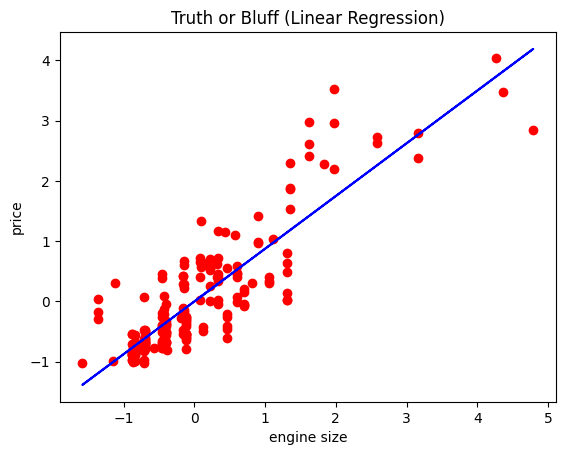

In [14]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('engine size')
plt.ylabel('price')
plt.show()

In [18]:
X = df[['enginesize']]   # ONLY ONE FEATURE
y = df['price']

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


LinearRegression()

In [20]:
X_sorted = X.sort_values(by='enginesize')
X_poly_sorted = poly_reg.transform(X_sorted)


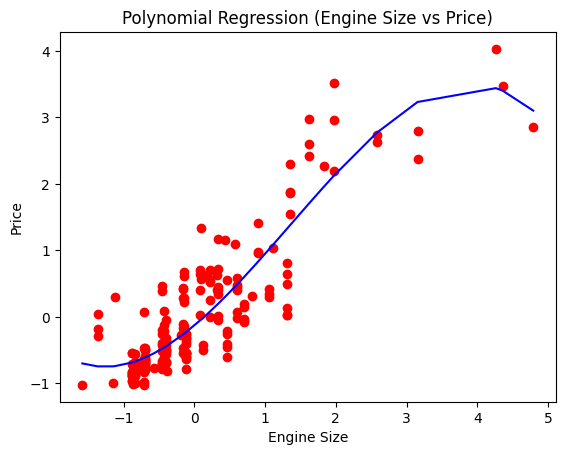

In [21]:

import matplotlib.pyplot as plt

plt.scatter(X, y, color='red')
plt.plot(X_sorted, lin_reg_2.predict(X_poly_sorted), color='blue')
plt.title('Polynomial Regression (Engine Size vs Price)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


In [16]:
import numpy as np
from sklearn.metrics import root_mean_squared_error,mean_squared_error, mean_absolute_error, r2_score

# Polynomial predictions
y_poly_pred = lin_reg_2.predict(poly_reg.transform(X))

# Metrics
mse = mean_squared_error(y, y_poly_pred)
mae = mean_absolute_error(y, y_poly_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_poly_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Squared Error (MSE): 0.2061300424477354
Mean Absolute Error (MAE): 0.33791109711541145
Root Mean Squared Error (RMSE): 0.4540154649874114
R² Score: 0.7938699575522646
